In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2DTranspose, MaxPooling2D
from keras.utils import np_utils

In [111]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

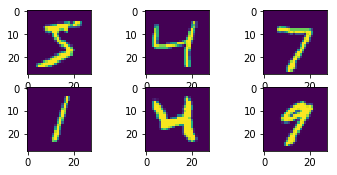

In [112]:
plt.subplot(331)
plt.imshow(X_train[0])
plt.subplot(332)
plt.imshow(X_train[2])
plt.subplot(333)
plt.imshow(X_test[0])
plt.subplot(334)
plt.imshow(X_test[2])
plt.subplot(335)
plt.imshow(X_train[20])
plt.subplot(336)
plt.imshow(X_test[20])

In [113]:
seed = 7
np.random.seed(seed)

In [114]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [115]:
X_train = X_train/255
X_test = X_test/255

In [116]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [117]:
num_classes = y_test.shape[1]

In [118]:
def base_model():
    model = Sequential()
    model.add(Conv2DTranspose(32, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [119]:
model = base_model() 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0373 - val_acc: 0.9868
Epoch 2/10
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0287 - acc: 0.9907 - val_loss: 0.0327 - val_acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 330s 6ms/step - loss: 0.0236 - acc: 0.9928 - val_loss: 0.0322 - val_acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 300s 5ms/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0388 - val_acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.0172 - acc: 0.9941 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0137 - acc: 0.9952 - val_loss: 0.0283 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 315s 5ms/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0344 - 